<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/Advertising_PerClickUsingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

# Import required library 

In [4]:
!pip install keras

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, Normalizer


# Import and understanding data

In [46]:
df = pd.read_csv("/content/advertising-1.csv")

data=pd.DataFrame(df)

In [10]:
#checking top 5 data
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0



# Data set description 
In this assignment you will be working with a dummy advertising data set, indicating whether or not a
particular internet user clicked on an Advertisement on a company website. you will try to create a model
that will predict whether or not they will click on an ad based on the features of that user.
This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [12]:
#checking shape of dataset
data.shape

(1000, 10)

In [13]:
# checking for the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
#Let's check if there are any missing values in our dataset 
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#### No null value is present

In [18]:
# descriptive statistics for numerical columns
data.describe().style.background_gradient(cmap = 'Blues')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.500000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.500250
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.500000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


#####  It is clearly shown that most of the featurs have no outlies in the dataset, but we are assuming 2 features (Area Income, Daily Internet Usage). So let's plot these 2 features and check for outliers.

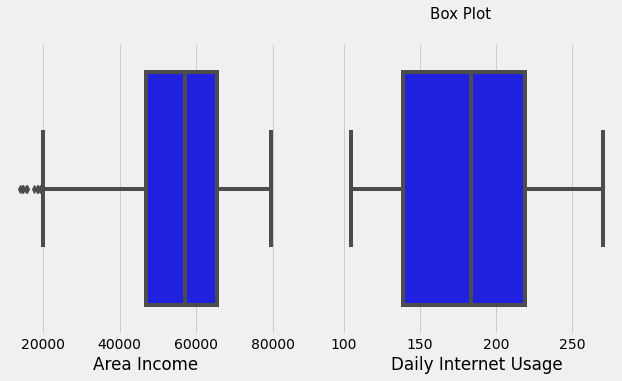

In [24]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')


plt.subplot(1, 3, 1)
sns.boxplot(data['Area Income'], color = 'blue')


plt.subplot(1, 3, 2)
sns.boxplot(data['Daily Internet Usage'], color = 'blue')



plt.suptitle('Box Plot', fontsize = 15)
plt.show()

"Area Income" col is having some outlier

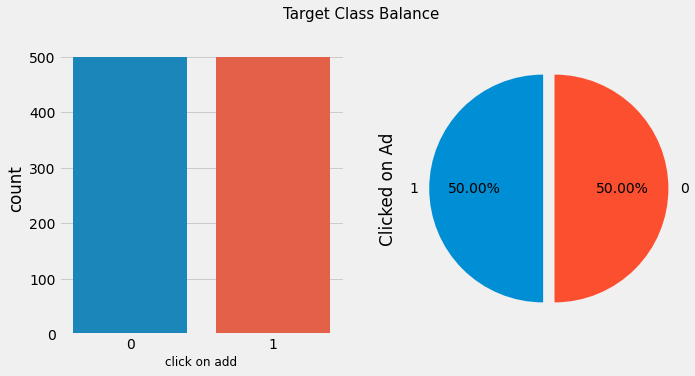

In [26]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data['Clicked on Ad'])

plt.xlabel('click on add' or 'not click on add', fontsize = 12)

plt.subplot(1, 2, 2)
data['Clicked on Ad'].value_counts().plot(kind = 'pie', explode = [0, 0.1], 
                                   autopct = '%.2f%%', startangle = 90, labels = ['1','0'])

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

### From above distribution it is evident that target class is highly balance

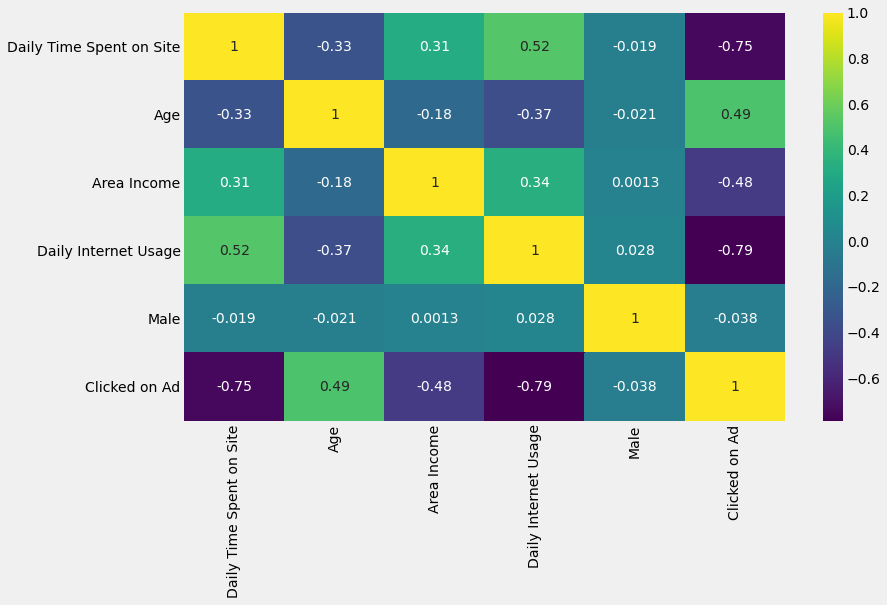

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
#plt.ylim(10, 0)

In [28]:
# descriptive statistics for catagorical column
data.describe(include = 'object')

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Customer-focused transitional strategy,Lisamouth,France,2016-02-29 12:31:57
freq,1,3,9,1


It is clearly shown that the "Ad Topic Line", "City", columns have almost 100% uniquness. 'Counry' col can also be dropped  So it'll not going to contribute much for building the model. Let's drop these columns.

In [29]:
# Dropping 'Ad Topic Line' ,'City','Country'col
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)



In [30]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of month'] = data['Timestamp'].dt.day
data['Day of week'] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour  
data = data.drop(['Timestamp'], axis=1)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [31]:
# checking for the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Day of month              1000 non-null   int64  
 8   Day of week               1000 non-null   int64  
 9   Hour                      1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [32]:
print(f"The shape of the DatFrame is: {data.shape}, which means there are {data.shape[0]} rows and {data.shape[1]} columns.")

The shape of the DatFrame is: (1000, 10), which means there are 1000 rows and 10 columns.


## Removing outlier , outlier count is 1% , so overall impact will be very less

In [33]:
data = data[data['Area Income'] > 20000]

In [34]:
print(f"The shape of the DatFrame is: {data.shape}, which means there are {data.shape[0]} rows and {data.shape[1]} columns.")

The shape of the DatFrame is: (990, 10), which means there are 990 rows and 10 columns.


## Data splitting

In [35]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',  
    'Male', 'Month', 'Day of month' ,'Day of week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
print("Training Data :",X_train.shape)
print("Testing Data :",X_test.shape)

Training Data : (663, 8)
Testing Data : (327, 8)


## Normalization of the data

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building ANN sequencial model

In [38]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fit the model to the training data for some epochs.

In [39]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 30, epochs = 100)




Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 0.3764 - accuracy: 0.8467
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 0.9748
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0934 - accuracy: 0.9696
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0610 - accuracy: 0.9837
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0742 - accuracy: 0.9724
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0509 - accuracy: 0.9895
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0559 - accuracy: 0.9812
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.9913
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0622 - accuracy: 0.9796
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9902
Epoch 11/

In [40]:
y_test_pred =ann.predict_classes(X_test)

# Accuracy matrics of ANN

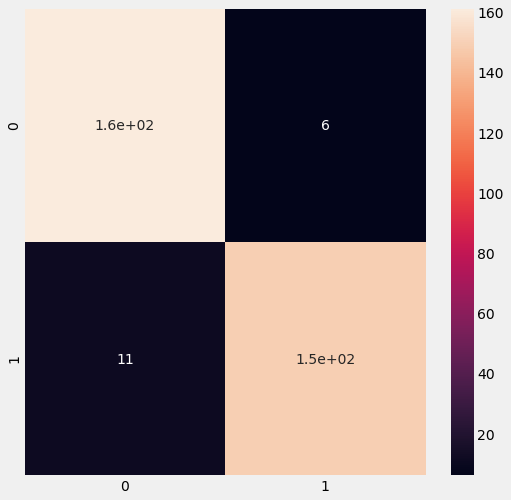

In [42]:
plt.rcParams['figure.figsize']=8,8
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)

In [43]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.9480122324159022
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       167
           1       0.96      0.93      0.95       160

    accuracy                           0.95       327
   macro avg       0.95      0.95      0.95       327
weighted avg       0.95      0.95      0.95       327



# Accuracy is 94% for test data , hence aforesaid model is good model